### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os 

#model_selection
from sklearn.model_selection import train_test_split 

## Metrics
from sklearn.metrics import mean_squared_error , r2_score


## Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,LabelEncoder ,OneHotEncoder
from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn_features.transformers import DataFrameSelector 

# models
from sklearn.linear_model import LinearRegression , SGDRegressor ,Ridge

## load dataset


In [2]:
path = 'housing.csv' #path of my dataset
df_housing =pd.read_csv(path) #load dataset 
df_housing.head() # show head of dataset 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.info() # basics informations (nulls and datatypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
## some statistics of the DF --> target column is (median_house_value)
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
##check for nulls 
df_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

###### Comment:
It seems that Dataset is a contains 20640 instances and only 207 null values in total_bedrooms feature, and also all datatypes is float64 as they are continuous numerical features except the (ocean_proximity) column which is nominal categorical Feature

# Exploratory Data Analysis (EDA)

In [6]:
## Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df_housing.ocean_proximity.value_counts()
print('categories of (ocean_proximity): \n', ocean_values)


categories of (ocean_proximity): 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


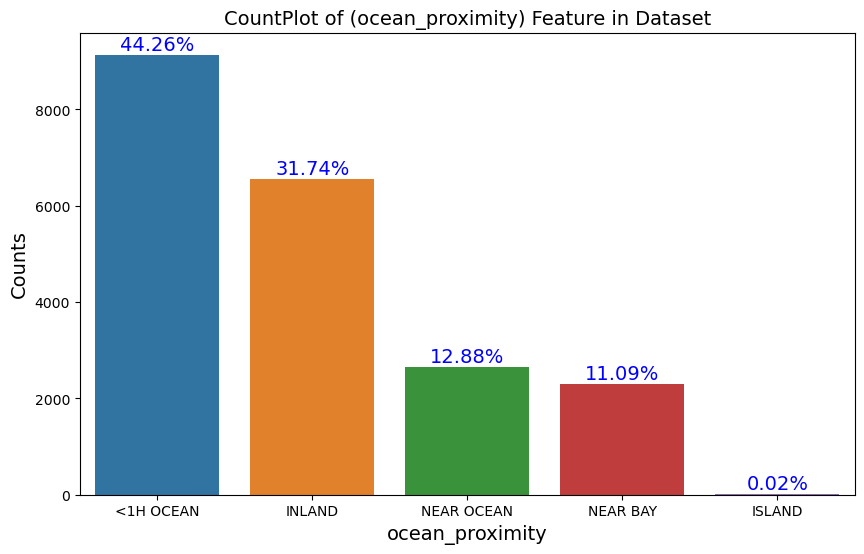

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)  ## ordered
plt.title('CountPlot of (ocean_proximity) Feature in Dataset', fontsize=14 )
plt.xlabel('ocean_proximity', fontsize=14)
plt.ylabel('Counts', fontsize=14)

## showing the percenatge
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    strt='{:0.2f}%'.format(100*count / df_housing.shape[0])
    plt.text(i, count+100, strt, ha='center', color='blue', fontsize=14)
    

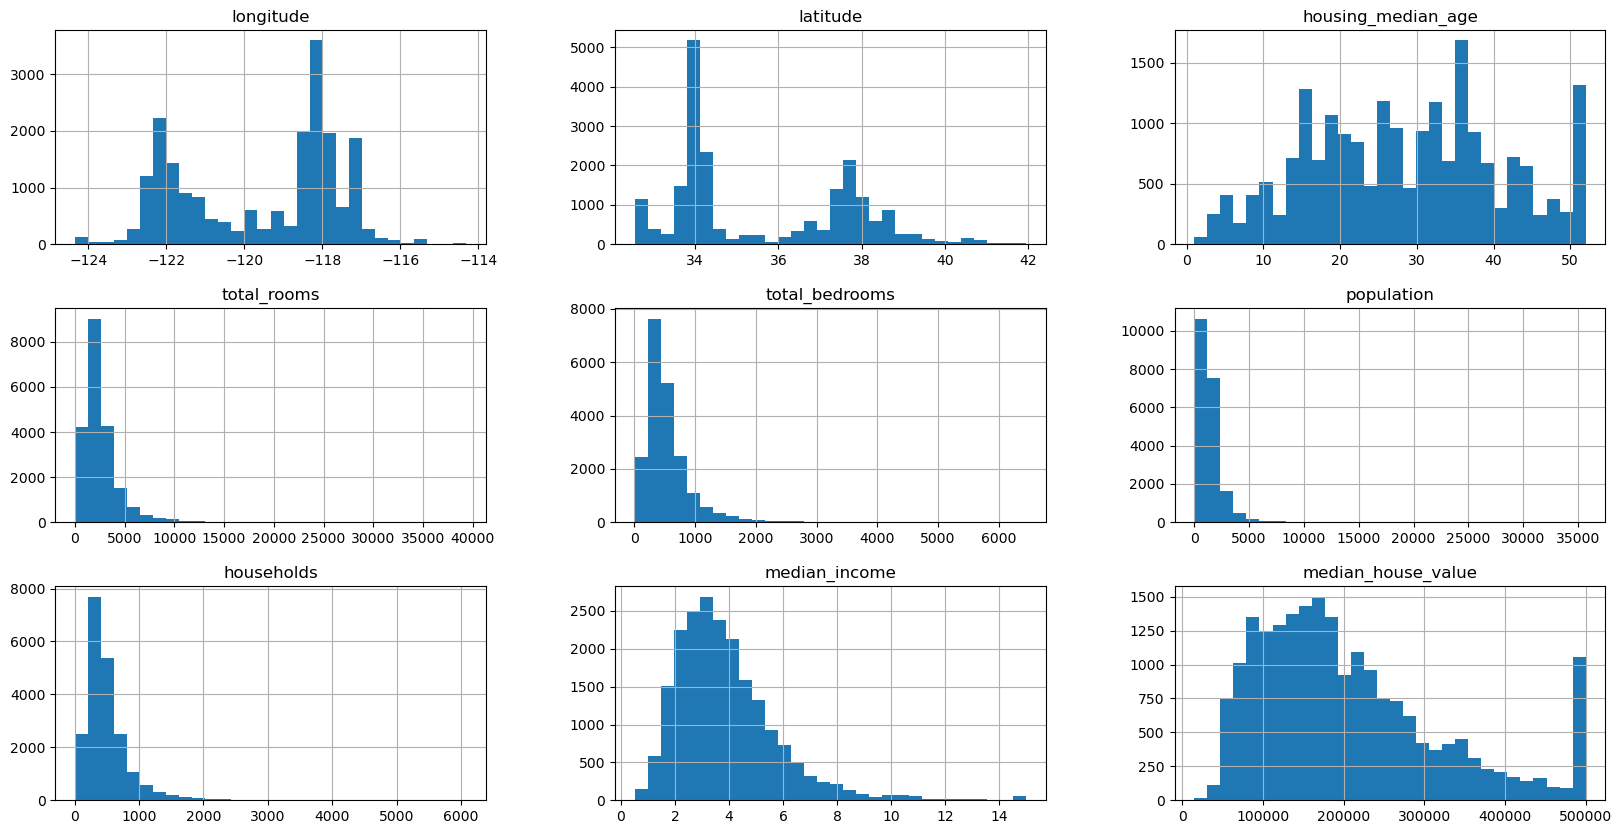

In [8]:
## Histogram Distribution of Numerical Variables in Dataset
df_housing.hist(bins=30, figsize=(20,10))
plt.show()

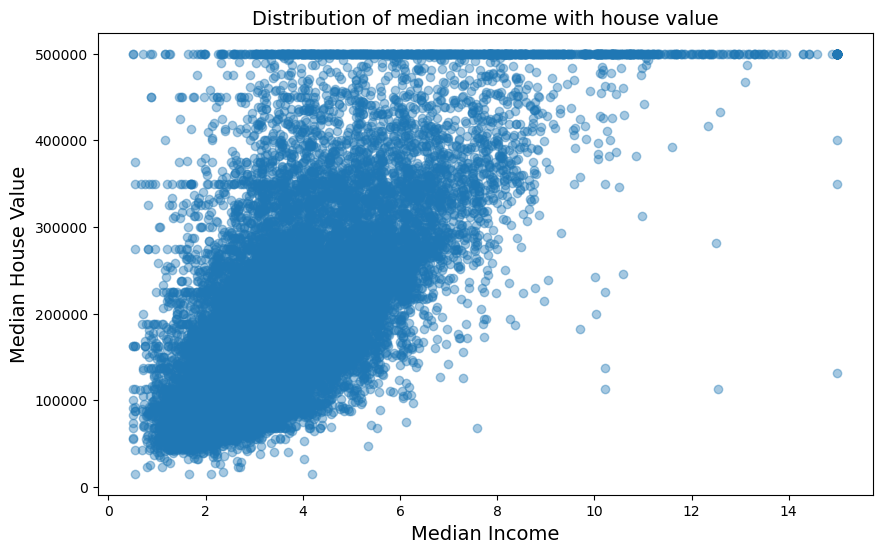

In [9]:
## scatte plot with important features (median_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=.4)
plt.title('Distribution of median income with house value', fontsize=14)
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.show()

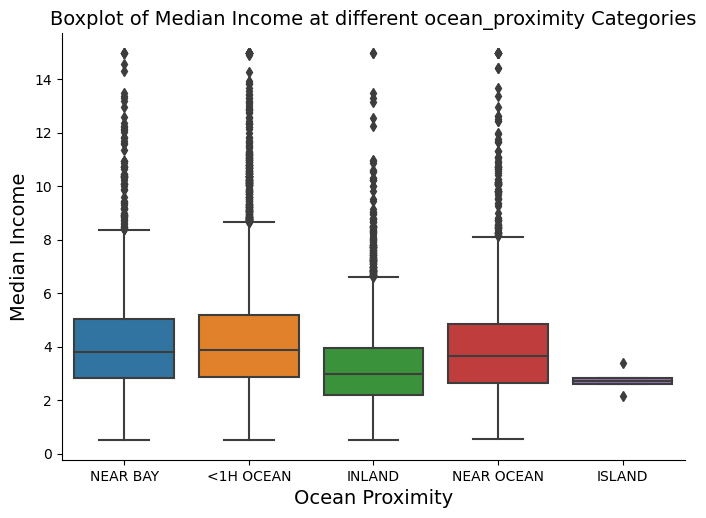

In [10]:
## Check the Boxplot of the (median_income) at different categories of (ocean_proximity)
sns.catplot(y='median_income', x='ocean_proximity', data=df_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median Income at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

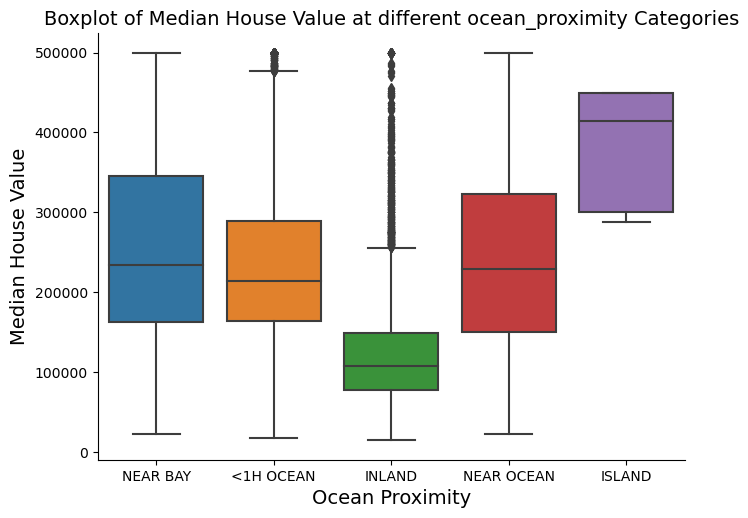

In [11]:
## Check the Boxplot of the (median_house_value) at different categories of (ocean_proximity)
sns.catplot(y='median_house_value', x='ocean_proximity', data=df_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

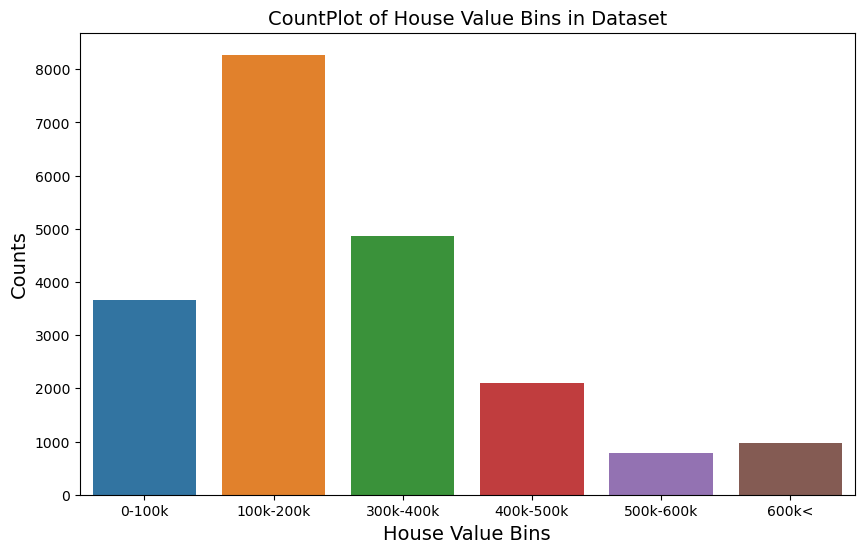

In [12]:
## Try for (median_house_value) to convert it to chunks (bins)
## Cut this numerical feature to categorical for its values to be in range will be in the same category
## In the following example -- any value between range (0-100k) will be the same category, I name it (0-100k)
house_value_bins = pd.cut(x=df_housing['median_house_value'], 
                          bins=[0, 100000, 200000, 300000, 400000, 500000, np.inf], 
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14)
plt.xlabel('House Value Bins', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()


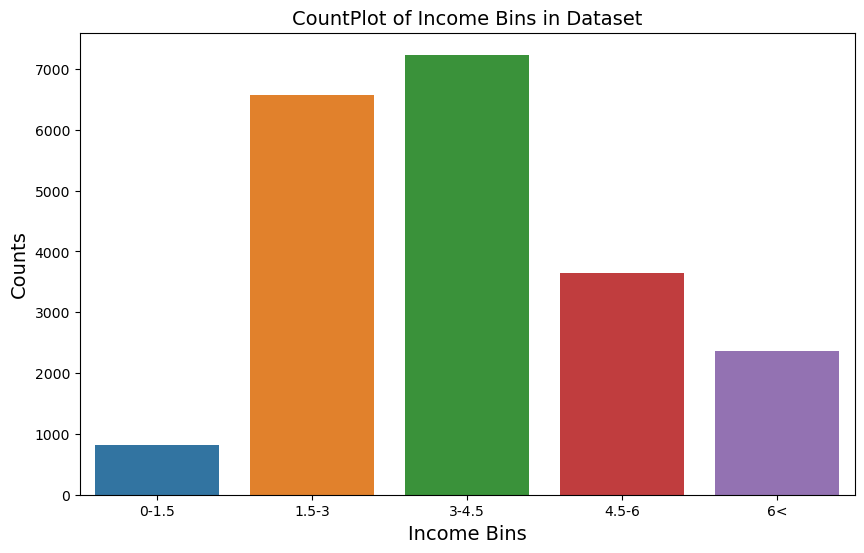

In [13]:
## Let's try the same above code for (median_income), I think it is very important feature
income_bins = pd.cut(x=df_housing['median_income'], 
                          bins=[0, 1.5, 3, 4.5, 6, np.inf],
                          labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

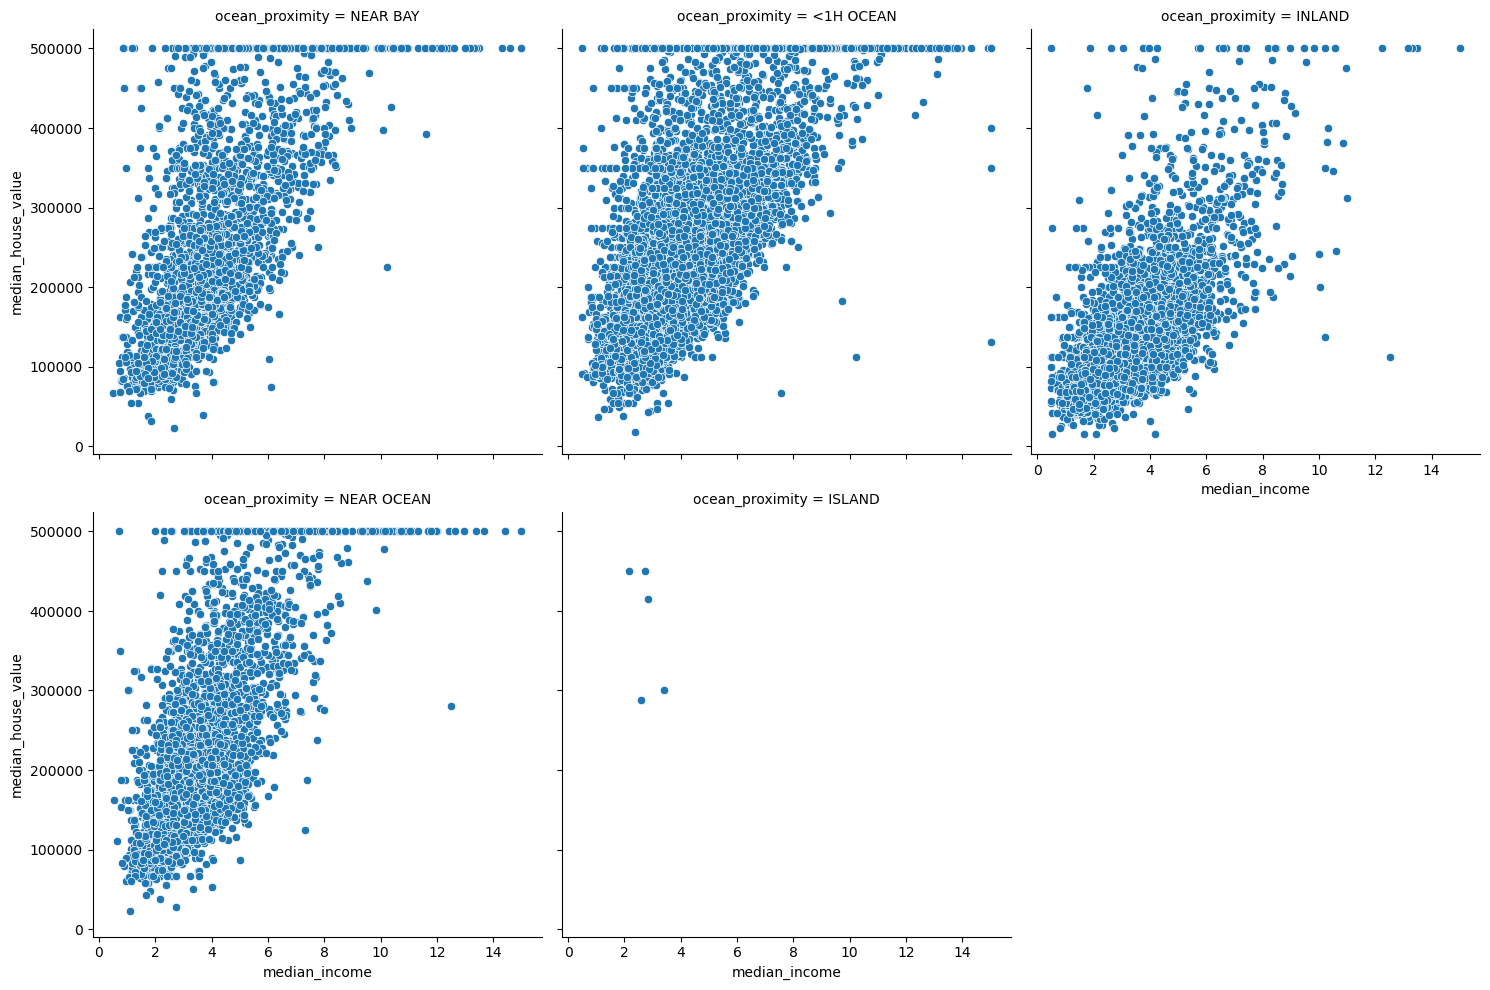

In [14]:
sns.relplot(x='median_income' ,y ='median_house_value' ,data= df_housing ,col='ocean_proximity', col_wrap=3 )

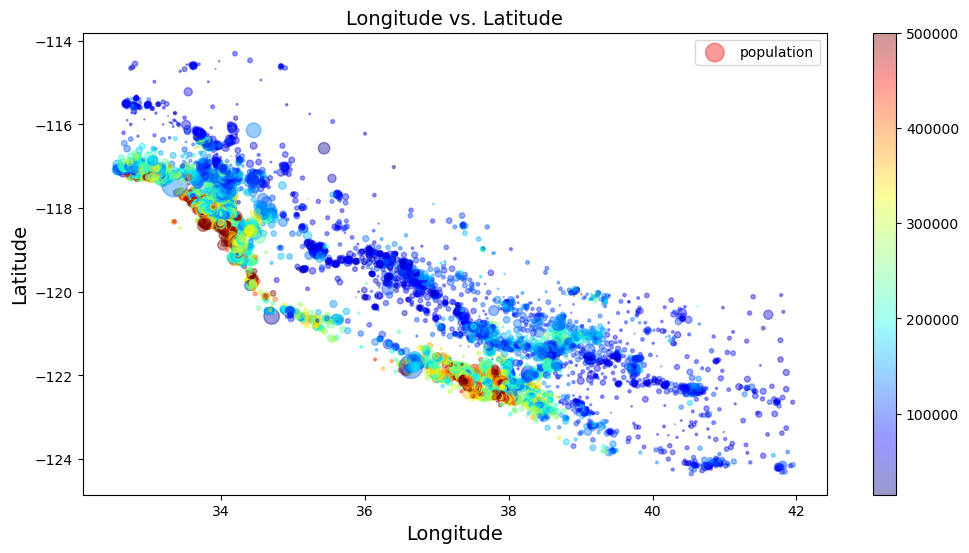

In [15]:
## Scatter plot for (longitued & latitued), and add population as the size of the point and the color as (house_value)
plt.figure(figsize=(12, 6))
sc =plt.scatter(y=df_housing['longitude'], x=df_housing['latitude'] ,alpha=0.4, c=df_housing['median_house_value'],
                cmap=plt.get_cmap('jet'), label='population' ,s=df_housing['population']/100)
plt.colorbar(sc)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('Longitude vs. Latitude', fontsize=14)
plt.legend()
plt.show()


In [16]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

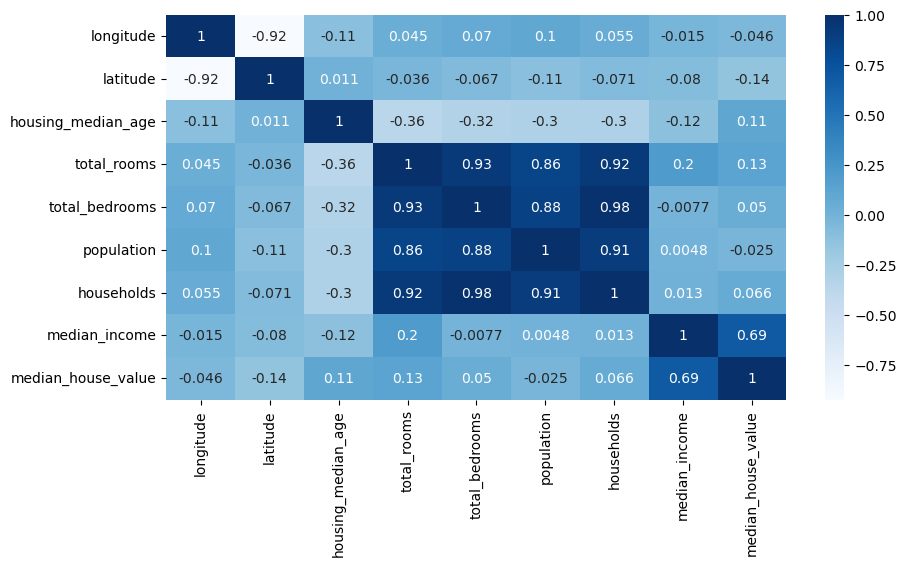

In [17]:
#show heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_housing.corr(),annot=True,cmap='Blues')
plt.show()


In [18]:
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [19]:
df_housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

# Split the Dataset

In [20]:
## Split the Whole dataset to features and target
X = df_housing.drop(columns ='median_house_value' ,axis=1 )
y= df_housing['median_house_value']

In [21]:
X_train_full , X_test, y_train_full , y_test= train_test_split(X, y , test_size=.15,shuffle=True ,random_state =42  )

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, 
                                                      random_state=125, shuffle=True)


In [23]:
## Separete the columns according to type (numerical or categorical)
numerical_cols = [cols for cols in X_train.columns if X_train[cols].dtype in ['float64']]
categorical_col = [cols for cols in X_train.columns if X_train[cols].dtype not in ['float64']]

In [24]:
## I choose to impute the nulls with median --> using SimpleImputer
#impute = SimpleImputer(strategy='median')

## fit and transform to training data (only Numerical)
#X_train_filled = impute.fit_transform(X_train[numerical_cols])

## transform valid and test datasets
#X_valid_filled =impute.transform(X_valid[numerical_cols])
#X_test_filled =impute.transform(X_test[numerical_cols])
                           

In [25]:
## using StandardScaler for each Feature to be (mean=0, std=1)
#scaler = StandardScaler()

## fit and transform to training data
#X_train_scaler = scaler.fit_transform(X_train_filled)

### transform valid and test datasets
#X_valid_scaler = scaler.transform(X_valid_filled)
#X_test_scaler  = scaler.transform(X_test_filled)

# Building a pipeline

In [26]:
'''
## Building a pipeline for numerical variables
my_pipeline = Pipeline([
                        ('impute',SimpleImputer(strategy='median')) ,
                         ('scaler',StandardScaler())
                        ])
X_train_pip =  my_pipeline.fit_transform(X_train[numerical_cols])
X_valid_pip =  my_pipeline.transform(X_valid[numerical_cols])
X_test_pip  =  my_pipeline.transform(X_test[numerical_cols])
'''

"\n## Building a pipeline for numerical variables\nmy_pipeline = Pipeline([\n                        ('impute',SimpleImputer(strategy='median')) ,\n                         ('scaler',StandardScaler())\n                        ])\nX_train_pip =  my_pipeline.fit_transform(X_train[numerical_cols])\nX_valid_pip =  my_pipeline.transform(X_valid[numerical_cols])\nX_test_pip  =  my_pipeline.transform(X_test[numerical_cols])\n"

In [27]:
'''
label = LabelEncoder()
X_train_encode = label.fit_transform(X_train[categorical_col].values[ : , 0])
X_valid_encode = label.transform(X_valid[categorical_col].values[ : , 0])
y_test_encode  = label.transform(X_test[categorical_col].values[ : ,0])
'''

'\nlabel = LabelEncoder()\nX_train_encode = label.fit_transform(X_train[categorical_col].values[ : , 0])\nX_valid_encode = label.transform(X_valid[categorical_col].values[ : , 0])\ny_test_encode  = label.transform(X_test[categorical_col].values[ : ,0])\n'

In [28]:
''''
## Define pipeline for categorical columns --> use OneHotEncoder = OHE
cate_pipeline= Pipeline(steps=[
                        ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                        ("OHE",OneHotEncoder(sparset=False))
                   ])
## fit and transform to train
X_train_categ = cate_pip.fit_transform(X_train[categorical_col])
X_valid_categ = cate_pip.transform(X_valid[categorical_col])
X_test_categ  = cate_pip.transform(X_test[categorical_col])
'''

'\'\n## Define pipeline for categorical columns --> use OneHotEncoder = OHE\ncate_pipeline= Pipeline(steps=[\n                        (\'imputer\',SimpleImputer(strategy=\'constant\',fill_value=\'missing\')),\n                        ("OHE",OneHotEncoder(sparset=False))\n                   ])\n## fit and transform to train\nX_train_categ = cate_pip.fit_transform(X_train[categorical_col])\nX_valid_categ = cate_pip.transform(X_valid[categorical_col])\nX_test_categ  = cate_pip.transform(X_test[categorical_col])\n'

## Get all Together
                 Numerical Pipeline and Cateforical Pipeline

In [29]:
## numerical pipeline
my_pipeline = Pipeline([
                         ('selector', DataFrameSelector(numerical_cols)),    ## select only numerical columns
                        ('imputer',SimpleImputer(strategy='median')) ,
                         ('scaler',StandardScaler())
                        ])

## categorical pipeline
cate_pipeline = Pipeline([
                        ('selector', DataFrameSelector(categorical_col)),
                        ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                        ("OHE",OneHotEncoder(sparse_output=False))
                   ])

## concatenate both two pipelines
total_pipeline =FeatureUnion(transformer_list=[
                                        ('num_pip',my_pipeline),
                                        ('categ_pipeline',cate_pipeline)
                                         ])
X_train_final = total_pipeline.fit_transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final  = total_pipeline.transform(X_test)

# Building ML Models
Evaluation Metric: MSE



### LinearRegression

In [30]:
#define linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final ,y_train)


LinearRegression()

In [31]:
## prediction
y_pred_train_lin = lin_reg.predict(X_train_final)
y_pred_valid_lin = lin_reg.predict(X_valid_final)

## RMSE
rmse_train_lin = (mean_squared_error(y_train, y_pred_train_lin))**0.5
rmse_valid_lin = (mean_squared_error(y_valid,y_pred_valid_lin))**0.5

In [32]:
print(rmse_train_lin)
print(rmse_valid_lin)

67443.41745647682
68286.48270417804


# Regularized Models for Linear Regression Model
SGDRegressor

In [33]:
## Define Ridge Model (Regularized Version of LinearRegression)
sgd_reg = SGDRegressor(penalty=None , eta0=0.001 , max_iter=10000 )
sgd_reg.fit(X_train_final,y_train)

SGDRegressor(eta0=0.001, max_iter=10000, penalty=None)

In [34]:
## prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)  ## predict the training data
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)  ## predict the training data

## RMSE
rmse_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd))**0.5
rmse_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd))**0.5



In [35]:
rmse_train_sgd , rmse_valid_sgd

(67596.25546866374, 68278.27328482612)